In [5]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import os
import warnings

In [6]:
# read csv/create dataframe
amzn_df = pd.read_csv("csv files\Amazon\AMZN2020-2022.csv")
amzn_df.head(10)

,Date,Open,High,Low,Close,Volume
0,2020-02-19,108.389999,109.254997,108.056000,108.511002,51224000
1,2020-02-20,108.653503,108.839500,106.372498,107.654999,62626000
2,2020-02-21,107.107498,107.227501,104.400002,104.798500,92926000
3,2020-02-24,100.158997,101.964996,99.398499,100.464500,130940000
4,2020-02-25,101.320999,101.730003,97.920998,98.637001,124382000
5,2020-02-26,98.514000,100.733498,98.022499,98.979500,104492000
6,2020-02-27,96.719002,98.750000,94.138000,94.214996,162880000
7,2020-02-28,90.731499,94.487999,90.556503,94.187500,189620000
8,2020-03-02,95.324501,97.725502,93.500000,97.697502,135234000
9,2020-03-03,98.768501,99.816498,94.404503,95.449501,150690000


In [7]:
# make copy for visualizations
viz = amzn_df.copy()

In [8]:
# list columns
amzn_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [9]:
# check for missing values
missing_values = amzn_df.isnull().sum()
missing_values

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [10]:
# dataframe info
amzn_info = amzn_df.info()
amzn_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    526 non-null    object 
 1   Open    526 non-null    float64
 2   High    526 non-null    float64
 3   Low     526 non-null    float64
 4   Close   526 non-null    float64
 5   Volume  526 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 24.8+ KB


In [11]:
# display stats for each column
summary_stats = amzn_df.describe().T
summary_stats

,count,mean,std,min,25%,50%,75%,max
Open,526.0,1.540902e+02,2.201764e+01,8.207550e+01,1.512132e+02,1.601458e+02,1.675500e+02,1.872000e+02
High,526.0,1.559407e+02,2.191812e+01,8.797250e+01,1.536737e+02,1.617158e+02,1.691309e+02,1.886540e+02
Low,526.0,1.520825e+02,2.193197e+01,8.130150e+01,1.486817e+02,1.581538e+02,1.655578e+02,1.848395e+02
Close,526.0,1.540035e+02,2.185591e+01,8.383050e+01,1.510276e+02,1.599987e+02,1.674465e+02,1.865705e+02
Volume,526.0,8.309968e+07,3.557938e+07,2.903800e+07,5.861750e+07,7.373600e+07,9.872650e+07,2.534560e+08


In [12]:
# convert date to datetime
amzn_df['Date'] = pd.to_datetime(amzn_df['Date'])

<Axes: >

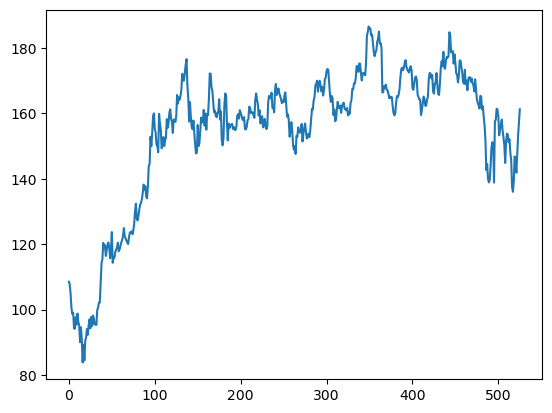

In [13]:
# plot closing
amzn_df['Close'].plot()

In [14]:
from sklearn.model_selection import train_test_split

#features
features = ['Open', 'High', 'Low', 'Close', 'Volume']
target = 'Close'

#split data
train_data, test_data = train_test_split(amzn_df, test_size=0.2, shuffle=False)


In [15]:
from statsmodels.tsa.arima.model import ARIMA

In [16]:
arima_model =ARIMA(train_data[target], order=(1, 1, 2))
arima_fit = arima_model.fit()

In [17]:
from sklearn.metrics import mean_squared_error

predictions = arima_fit.forecast(steps=len(test_data))
mse = mean_squared_error(test_data[target], predictions)
print(mse)

207.6902830486299


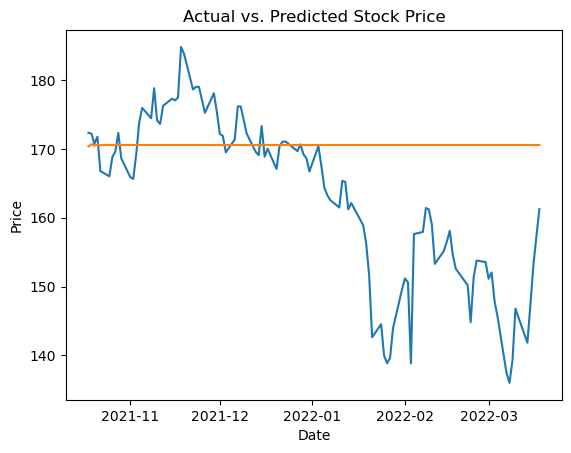

In [18]:
# plot
plt.plot(test_data['Date'], test_data[target], label='Actual')
plt.plot(test_data['Date'], predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Stock Price')
plt.show()

In [ ]:
pip install xgboost

In [22]:
import xgboost as xgb

#features
features = ['Open', 'High', 'Low', 'Close', 'Volume']
target = 'Close'

train_dmatrix = xgb.DMatrix(data=train_data[features], label=train_data[target])

# Define XGBoost parameters
params = {
    'objective': 'reg:squarederror',
    'max_depth': 3,
    'learning_rate': 0.1
}

# Train the XGBoost model
xgb_model = xgb.train(params=params, dtrain=train_dmatrix)

In [23]:
# Create DMatrix for test data
test_dmatrix = xgb.DMatrix(data=test_data[features], label=test_data[target])

# Use the trained XGBoost model to make predictions
xgb_predictions = xgb_model.predict(test_dmatrix)

# Calculate Mean Squared Error
mse_xgb = mean_squared_error(test_data[target], xgb_predictions)

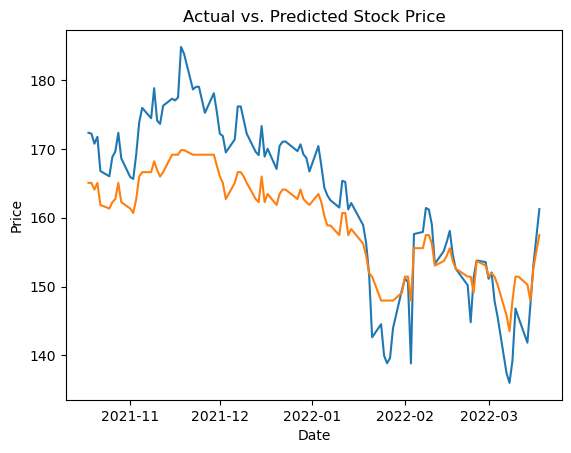

In [24]:
# plot
plt.plot(test_data['Date'], test_data[target], label='Actual')
plt.plot(test_data['Date'], xgb_predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Stock Price')
plt.show()
